In [1]:
# Import all the basic required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# Data Collection & Pre-processing

In [2]:
# Loading the csv file in Dataframe

df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis (EDA)

In [3]:
# Display the concise summary of a dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Check the missing values

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# Check the duplicate values

df.duplicated().sum()

0

In [6]:
# check the statistic summary of numeric attributes

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


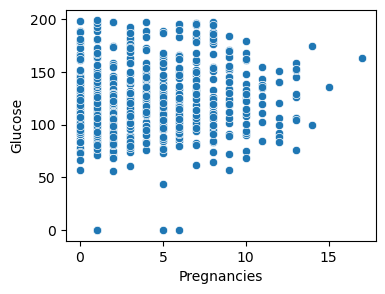

In [7]:
# Create a scatterplot chart to see the relationship between Features.

plt.figure(figsize = (4,3))
sns.scatterplot(data = df, x = 'Pregnancies', y = 'Glucose')
plt.show()

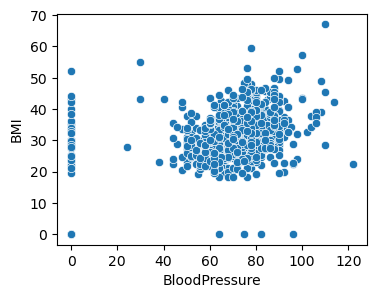

In [8]:
# Create a scatterplot chart to see the relationship between Features.

plt.figure(figsize = (4,3))
sns.scatterplot(data = df, x = 'BloodPressure', y = 'BMI')
plt.show()

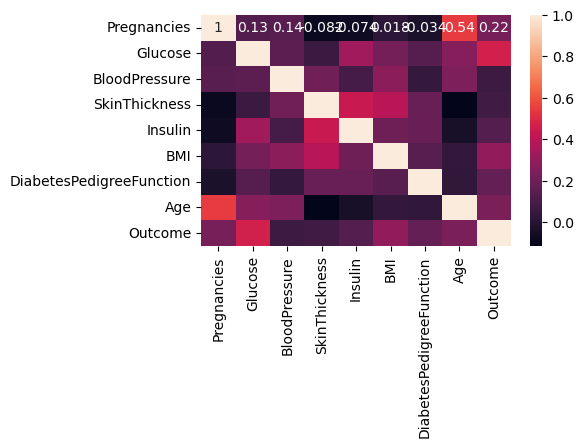

In [9]:
# Check the correlation of features using heatmap

plt.figure(figsize = (5,3))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [10]:
# Check the correlation of features

df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [11]:
# check the distribution of Target Variable
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

# Seperate the Features and Target variable

In [12]:
# seperate the features input and target variable
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [13]:
# Check the data of X

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
# Check the data of y

y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Train Test Split

In [15]:
# Splitting the data into Training and Testing data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [16]:
# checking the shape of X_train, x_test

print(X.shape, X_train.shape, X_test.shape)

(768, 8) (537, 8) (231, 8)


In [17]:
# Scaling the data using StandardScaler()

ss = StandardScaler() # Create the object of StandardScaler
X_train = ss.fit_transform(X_train) # Fit the scaler on the training data & apply the transformation
X_test = ss.transform(X_test) # Apply the same transformation to test data

In [18]:
X_train

array([[ 3.3536084 ,  0.48047259,  0.05216975, ...,  0.68611992,
        -0.94690147,  0.81020454],
       [-1.12101735, -0.76891126, -0.2463932 , ...,  0.64699564,
         0.39612987, -0.69526203],
       [-0.82270897, -0.16023707,  0.05216975, ..., -0.5788985 ,
        -0.7936697 , -1.02981015],
       ...,
       [ 2.75699163,  0.16011776,  1.04737957, ...,  1.50772982,
         0.34505262,  0.72656751],
       [ 0.07221618,  1.60171451,  0.15169073, ...,  1.53381267,
         0.03258   , -0.611625  ],
       [ 1.5637581 , -0.60873384,  0.3507327 , ...,  0.13837998,
         0.59142526,  1.06111563]])

In [19]:
X_test

array([[ 0.96714133,  0.48047259,  0.25121172, ..., -0.76147848,
         0.53734346,  1.47930079],
       [-0.82270897,  0.96100484, -0.44543516, ..., -0.74843705,
        -0.86878331, -0.94617312],
       [ 0.66883295, -0.38448546, -0.44543516, ..., -0.89189275,
        -0.78766061, -0.52798796],
       ...,
       [-0.82270897, -0.96112415, -0.74399811, ..., -0.8658099 ,
        -0.70353337, -0.86253609],
       [ 1.86206648,  1.50560806,  0.25121172, ...,  0.80349276,
         0.20684358,  0.05747126],
       [ 1.5637581 , -0.28837901,  0.64929565, ...,  0.30791853,
        -0.62541522,  0.22474532]])

# Model Training

In [20]:
# Creating user defined function for training and testing the model.

def myfunc(model):

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Predict the labels for the test data
    y_pred = model.predict(X_test)

    # Print the confusion matrix to evaluate the performance of the classification model
    print(confusion_matrix(y_test, y_pred))

    # Print the classification report for detailed performance metrics such as precision, recall, and F1-score
    print(classification_report(y_test, y_pred))

    # Return the trained model
    return model

# Logistic Regression

In [21]:
# Initialize a LogisticRegression model
logr = LogisticRegression()

# Apply the custom function 'myfunc' to LogisticRegression model
logr = myfunc(logr)

[[132  14]
 [ 36  49]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



# Decision Tree Classifier

In [22]:
# Initialize a DecisionTreeClassifier model
dtc = DecisionTreeClassifier(random_state = 1) # By default it will consider gini index.

# Apply the custom function 'myfunc' to DecisionTreeClassifier model
dtc = myfunc(dtc)

[[117  29]
 [ 42  43]]
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       146
           1       0.60      0.51      0.55        85

    accuracy                           0.69       231
   macro avg       0.67      0.65      0.66       231
weighted avg       0.68      0.69      0.69       231



In [23]:
# Creating a dataframe to check the feature importances.

dict = {'Input columns': X.columns, 'Information Gain': dtc.feature_importances_}
dict = pd.DataFrame(dict)
dict.sort_values(by='Information Gain', ascending=False, ignore_index = True)

,Input columns,Information Gain
0,Glucose,0.286047
1,BMI,0.175812
2,BloodPressure,0.168084
3,Age,0.120103
4,DiabetesPedigreeFunction,0.118873
5,Pregnancies,0.050616
6,SkinThickness,0.048001
7,Insulin,0.032465


# Decision Tree Classifier(Gini Index): max_depth hyperparameter

In [24]:
# Iterate over a range of max_depth values from 1 to 8
'''
for i in range(1,9):

    # initialize a DecisionTreeClassifier with max_depth hyper-parameter
    dtc1 = DecisionTreeClassifier(random_state = 1, max_depth = i)
    
    print('\n Max_depth:', i) # Print the max depth

    # Apply the custom function 'myfunc' to DecisionTreeClassifier model
    dtc1 = myfunc(dtc1)
'''

dtc1 = DecisionTreeClassifier(random_state=1, max_depth=5)
dtc1 = myfunc(dtc1)

[[122  24]
 [ 30  55]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.70      0.65      0.67        85

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.76      0.77      0.76       231



In [25]:
# Creating a dataframe to check the feature importances.

dict = {'Input columns': X.columns, 'Information Gain': dtc1.feature_importances_}
dict = pd.DataFrame(dict)
dict.sort_values(by='Information Gain', ascending=False, ignore_index = True)

,Input columns,Information Gain
0,Glucose,0.450911
1,BMI,0.231458
2,Age,0.126493
3,DiabetesPedigreeFunction,0.097968
4,Pregnancies,0.055619
5,BloodPressure,0.024713
6,SkinThickness,0.012839
7,Insulin,0.000000


# Decision Tree Classifier(Gini Index): min_samples_leaf hyperparameter

In [26]:
# Iterate over a range of min_samples_leaf values from 45 to 100
'''
for i in range(45,101):

    # initialize a DecisionTreeClassifier with min_samples_leaf hyper-parameter
    dtc2 = DecisionTreeClassifier(random_state = 1, min_samples_leaf = i)
    
    print('\n Min Samples Leaf:', i) # Print the min samples leaf

    # Apply the custom function 'myfunc' to DecisionTreeClassifier model
    dtc2 = myfunc(dtc2)
'''

dtc2 = DecisionTreeClassifier(random_state = 1, min_samples_leaf = 45)
dtc2 = myfunc(dtc2)

[[125  21]
 [ 25  60]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       146
           1       0.74      0.71      0.72        85

    accuracy                           0.80       231
   macro avg       0.79      0.78      0.78       231
weighted avg       0.80      0.80      0.80       231



In [27]:
# Creating a dataframe to check the feature importances.

dict = {'Input columns': X.columns, 'Information Gain': dtc2.feature_importances_}
dict = pd.DataFrame(dict)
dict.sort_values(by='Information Gain', ascending=False, ignore_index = True)

,Input columns,Information Gain
0,Glucose,0.574068
1,BMI,0.261437
2,Age,0.098884
3,DiabetesPedigreeFunction,0.062856
4,Pregnancies,0.002755
5,BloodPressure,0.000000
6,SkinThickness,0.000000
7,Insulin,0.000000


# Decision Tree Classifier(Entropy): max_depth hyperparameter

In [28]:
# Iterate over a range of max_depth values from 1 to 8
'''
for i in range(1,9):

    # initialize a DecisionTreeClassifier with max_depth hyper-parameter
    dtc3 = DecisionTreeClassifier(random_state = 1, criterion = 'entropy', max_depth = i)
    
    print('\n Max_depth:', i) # Print the max depth

    # Apply the custom function 'myfunc' to DecisionTreeClassifier model
    dtc3 = myfunc(dtc3)
'''

dtc3 = DecisionTreeClassifier(random_state = 1, criterion = 'entropy', max_depth = 7)
dtc3 = myfunc(dtc3)

[[116  30]
 [ 22  63]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       146
           1       0.68      0.74      0.71        85

    accuracy                           0.77       231
   macro avg       0.76      0.77      0.76       231
weighted avg       0.78      0.77      0.78       231



In [29]:
# Creating a dataframe to check the feature importances.

dict = {'Input columns': X.columns, 'Information Gain': dtc3.feature_importances_}
dict = pd.DataFrame(dict)
dict.sort_values(by='Information Gain', ascending=False, ignore_index = True)

,Input columns,Information Gain
0,Glucose,0.328341
1,BMI,0.275093
2,Age,0.118530
3,DiabetesPedigreeFunction,0.092371
4,BloodPressure,0.090745
5,Pregnancies,0.053629
6,Insulin,0.021004
7,SkinThickness,0.020287


# Decision Tree Classifier(Entropy): Min_samples_leaf hyperparameter

In [30]:
# Iterate over a range of min_samples_leaf values from 45 to 100
'''
for i in range(45,101):

    # initialize a DecisionTreeClassifier with min_samples_leaf hyper-parameter
    dtc4 = DecisionTreeClassifier(random_state = 1, criterion = 'entropy', min_samples_leaf = i)
    
    print('\n Min Samples Leaf:', i) # Print the min samples leaf

    # Apply the custom function 'myfunc' to DecisionTreeClassifier model
    dtc4 = myfunc(dtc4)
'''

dtc4 = DecisionTreeClassifier(random_state = 1, criterion = 'entropy', min_samples_leaf = 49)
dtc4 = myfunc(dtc4)

[[131  15]
 [ 32  53]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       146
           1       0.78      0.62      0.69        85

    accuracy                           0.80       231
   macro avg       0.79      0.76      0.77       231
weighted avg       0.79      0.80      0.79       231



In [31]:
# Creating a dataframe to check the feature importances.

dict = {'Input columns': X.columns, 'Information Gain': dtc4.feature_importances_}
dict = pd.DataFrame(dict)
dict.sort_values(by='Information Gain', ascending=False, ignore_index = True)

,Input columns,Information Gain
0,Glucose,0.567561
1,BMI,0.314900
2,Age,0.117539
3,Pregnancies,0.000000
4,BloodPressure,0.000000
5,SkinThickness,0.000000
6,Insulin,0.000000
7,DiabetesPedigreeFunction,0.000000


# Random forest Classifier

In [32]:
# Iterate over a range of n_estimators values from 10 to 100
'''
for i in range(10, 101):

    #initialize a RandomForestClassifier with that number of estimators
    rfc = RandomForestClassifier(n_estimators = i, random_state = 1)
    
    print('\n No. of estimators:', i) # Print the no. of estimators

    # Apply the custom function 'myfunc' to DecisionTreeClassifier model
    rfc = myfunc(rfc)
'''

rfc = RandomForestClassifier(n_estimators = 29, random_state = 1)
rfc = myfunc(rfc)

[[130  16]
 [ 26  59]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       146
           1       0.79      0.69      0.74        85

    accuracy                           0.82       231
   macro avg       0.81      0.79      0.80       231
weighted avg       0.82      0.82      0.82       231



In [33]:
# Creating a dataframe to check the feature importances.

dict = {'Input columns': X.columns, 'Information Gain': rfc.feature_importances_}
dict = pd.DataFrame(dict)
dict.sort_values(by='Information Gain', ascending = False, ignore_index = True)

,Input columns,Information Gain
0,Glucose,0.252912
1,BMI,0.166068
2,DiabetesPedigreeFunction,0.138780
3,Age,0.133714
4,BloodPressure,0.099226
5,Pregnancies,0.077773
6,SkinThickness,0.070698
7,Insulin,0.060829


# ADA Boost Classifier

In [34]:
# Iterate over a range of n_estimators values from 1 to 16
'''
for i in range(1, 17):

    # initialize an AdaBoostClassifier with that number of estimators
    abc = AdaBoostClassifier(n_estimators = i, random_state = 1)
    
    print('\n No. of estimators:', i) # Print the no. of estimators

    # Apply the custom function 'myfunc' to DecisionTreeClassifier model
    abc = myfunc(abc)
'''

abc = AdaBoostClassifier(n_estimators = 15, random_state = 1)
abc = myfunc(abc)

[[128  18]
 [ 33  52]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.83       146
           1       0.74      0.61      0.67        85

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231



In [35]:
# Creating a dataframe to check the feature importances.

dict = {'Input columns': X.columns, 'Information Gain': abc.feature_importances_}
dict = pd.DataFrame(dict)
dict.sort_values(by='Information Gain', ascending = False, ignore_index = True)

,Input columns,Information Gain
0,Glucose,0.333333
1,DiabetesPedigreeFunction,0.200000
2,Age,0.200000
3,BMI,0.133333
4,Pregnancies,0.066667
5,BloodPressure,0.066667
6,SkinThickness,0.000000
7,Insulin,0.000000


# Gradient Boosting Classifier

In [36]:
# Iterate over a range of n_estimators values from 1 to 100
'''
for i in range(10, 101):

    # initialize a GradientBoostingClassifier with that number of estimators
    gbc = GradientBoostingClassifier(n_estimators = i, random_state = 1)
    
    print('\n No. of Estimators:', i) # Print the no. of estimators

    # Apply the custom function 'myfunc' to DecisionTreeClassifier model
    gbc = myfunc(gbc)
'''

gbc = GradientBoostingClassifier(n_estimators = 36, random_state = 1)
gbc = myfunc(gbc)

[[126  20]
 [ 27  58]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       146
           1       0.74      0.68      0.71        85

    accuracy                           0.80       231
   macro avg       0.78      0.77      0.78       231
weighted avg       0.79      0.80      0.79       231



In [37]:
# Creating a dataframe to check the feature importances.

dict = {'Input columns': X.columns, 'Information Gain': gbc.feature_importances_}
dict = pd.DataFrame(dict)
dict.sort_values(by='Information Gain', ascending = False, ignore_index = True)

,Input columns,Information Gain
0,Glucose,0.432682
1,BMI,0.240545
2,Age,0.134924
3,DiabetesPedigreeFunction,0.091214
4,Pregnancies,0.045422
5,BloodPressure,0.023756
6,Insulin,0.020708
7,SkinThickness,0.010750


# Extreme Gradient Boosting Classifier

In [38]:
# Iterate over a range of n_estimators values from 10 to 100
'''
for i in range(10, 101):

    # initialize an XGBClassifier with that number of estimators
    xgbc = XGBClassifier(n_estimators = i, reg_alpha = 1, random_state = 1)
    
    print('\n No. of estimators:', i) # Print the no. of estimators

    # Apply the custom function 'myfunc' to DecisionTreeClassifier model
    xgbc = myfunc(xgbc)
'''

xgbc = XGBClassifier(n_estimators = 54, reg_alpha = 1, random_state = 1)
xgbc = myfunc(xgbc)

[[126  20]
 [ 29  56]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       146
           1       0.74      0.66      0.70        85

    accuracy                           0.79       231
   macro avg       0.77      0.76      0.77       231
weighted avg       0.78      0.79      0.79       231



In [39]:
# Creating a dataframe to check the feature importances.

dict = {'Input columns': X.columns, 'Information Gain': xgbc.feature_importances_}
dict = pd.DataFrame(dict)
dict.sort_values(by='Information Gain', ascending = False, ignore_index = True)

,Input columns,Information Gain
0,Glucose,0.293739
1,BMI,0.166969
2,Age,0.148568
3,DiabetesPedigreeFunction,0.102046
4,BloodPressure,0.083304
5,SkinThickness,0.073117
6,Pregnancies,0.072046
7,Insulin,0.060212


# Support Vector Classifier

In [40]:
lsvc = LinearSVC(random_state = 1, C = 0.5) # Initialize a Linear Support Vector Classification (LinearSVC) model with a
# regularization parameter (C) of 0.5 and a fixed random state
lsvc = myfunc(lsvc) # Apply the custom function 'myfunc' to Support Vector classifier model

[[132  14]
 [ 36  49]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [41]:
poly_svc = SVC(random_state = 1, kernel = 'poly') # Initialize a Support Vector Classification (SVC) model with a polynomial kernel
# and a fixed random state
poly_svc = myfunc(poly_svc) # Apply the custom function 'myfunc' to support vector Classifier model

[[141   5]
 [ 55  30]]
              precision    recall  f1-score   support

           0       0.72      0.97      0.82       146
           1       0.86      0.35      0.50        85

    accuracy                           0.74       231
   macro avg       0.79      0.66      0.66       231
weighted avg       0.77      0.74      0.71       231



In [42]:
svc_radial = SVC(random_state = 1, kernel = 'rbf') # Initialize a support Vector Classification (SVC) model with a
# radial basis function kernel and a fixed random state
svc_radial = myfunc(svc_radial) # Apply the custom function 'myfunc' to support vector classifier model

[[134  12]
 [ 36  49]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       146
           1       0.80      0.58      0.67        85

    accuracy                           0.79       231
   macro avg       0.80      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231



# All Model's Score

In [43]:
# All Model's scores:
'''
Logistic Regression: Accuracy = 78%
Decision Tree Gini Index(Min_Samples_Leaf): Accuracy = 80%
Random Forest Classifier: Accuracy = 82%
ADA Boost Classifier: Accuracy = 78%
Gradient Boost Classifier: Accuracy = 80%
Extreme Gradient Boost Classifier: Accuracy = 79%
Support Vector Classifier(Non-Linear): Accuracy = 79%
'''

'\nLogistic Regression: Accuracy = 78%\nDecision Tree Gini Index(Min_Samples_Leaf): Accuracy = 80%\nRandom Forest Classifier: Accuracy = 82%\nADA Boost Classifier: Accuracy = 78%\nGradient Boost Classifier: Accuracy = 80%\nExtreme Gradient Boost Classifier: Accuracy = 79%\nSupport Vector Classifier(Non-Linear): Accuracy = 79%\n'

# Conclusion

In [44]:
# Conclusion:
'''
We tested various models to predict the outcome, aiming for the highest accuracy. Among them,
Random Forest yielded the best results, measured by accuracy, precision, recall, and F1-scores.
Random forest classifier: 82% accuracy.
We consider the Random forest classifier is the more reliable model. given its high accuracy compared
 to the other models tested.
'''

'\nWe tested various models to predict the outcome, aiming for the highest accuracy. Among them,\nRandom Forest yielded the best results, measured by accuracy, precision, recall, and F1-scores.\nRandom forest classifier: 82% accuracy.\nWe consider the Random forest classifier is the more reliable model. given its high accuracy compared\n to the other models tested.\n'

# Model Deploy

In [45]:
# Save model:-
# Use file handling of python: use inbuilt library 'pickle'
import pickle

# To open file in write binary for model create
file1 = open('diab_model.pkl', 'wb') # diab_model: new file which store object
# of algorithms which has the highest score

file2 = open('diab_scale.pkl', 'wb') # new file which store the object of standard
# scale.

In [46]:
# save object of algorithm of (Random Forest classifier) class in temp file
# file1 and file2
pickle.dump(rfc, file1)

# To close temp file 'file1'
file1.close()

In [47]:
# save object of standardscaler class
pickle.dump(ss, file2)

# to close temp file 'file2'
file2.close()

In [48]:
# To read file in read binary mode(rb)
# to open file in read mode for model
file1 = open('diab_model.pkl', 'rb')

# To open file in read mode for scale
file2 = open('diab_scale.pkl', 'rb')

In [49]:
# to read data from file1 and hold in temp object
model = pickle.load(file1) # Load() inbuilt method of pickle class
scale = pickle.load(file2) # Load() inbuilt method of pickle class

In [50]:
# input()
Pregnancies = int(input('Enter pregnancies:'))
Glucose = int(input('Enter Glucose:'))
BloodPressure = int(input('Enter BloodPressure:'))
SkinThickness = int(input('Enter SkinThickness:'))
Insulin = int(input('Enter Insulin:'))
BMI = float(input('Enter BMI:'))
DiabetesPedigreeFunction = float(input('Enter DiabetesPedigreeFunction:'))
Age = int(input('Enter Age:'))

Enter pregnancies: 4
Enter Glucose: 110
Enter BloodPressure: 92
Enter SkinThickness: 0
Enter Insulin: 0
Enter BMI: 37.6
Enter DiabetesPedigreeFunction: 0.191
Enter Age: 30


In [51]:
# Create numpy 2D array
import numpy as np
data = np.array([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,
                 BMI, DiabetesPedigreeFunction, Age]])
print(type(data), data.ndim)
print(data)

<class 'numpy.ndarray'> 2
[[  4.    110.     92.      0.      0.     37.6     0.191  30.   ]]


In [52]:
# Apply scaling on data
data = scale.transform(data)
print(data)

[[ 0.07221618 -0.35244997  1.14690056 -1.2257217  -0.68822177  0.75132705
  -0.83272878 -0.27707687]]


In [53]:
y_pred = model.predict(data)
print(y_pred)

[0]
